In [43]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import re
import string
import nltk 
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.tokenize import TweetTokenizer

In [44]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\femin\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [45]:
data = pd.read_csv('C:/Users/femin/MP_Final/Detox_datasets/Million/resultant_mill.csv', index_col=0)

In [46]:
data.head()

,count,hate_speech,offensive_language,neither,class,tweet
0,3.0,0.0,0.0,3.0,2,!!! RT @mayasolovely: As a woman you shouldn't...
1,3.0,0.0,3.0,0.0,1,!!!!! RT @mleew17: boy dats cold...tyga dwn ba...
2,3.0,0.0,3.0,0.0,1,!!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbaby...
3,3.0,0.0,2.0,1.0,1,!!!!!!!!! RT @C_G_Anderson: @viva_based she lo...
4,6.0,0.0,6.0,0.0,1,!!!!!!!!!!!!! RT @ShenikaRoberts: The shit you...


In [47]:
data.drop(['hate_speech','count','offensive_language','neither'],axis=1,inplace=True)
data['class'] = data['class'].replace([1],0)
data['class'] = data['class'].replace([2],1)

In [48]:
data.head()

,class,tweet
0,1,!!! RT @mayasolovely: As a woman you shouldn't...
1,0,!!!!! RT @mleew17: boy dats cold...tyga dwn ba...
2,0,!!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbaby...
3,0,!!!!!!!!! RT @C_G_Anderson: @viva_based she lo...
4,0,!!!!!!!!!!!!! RT @ShenikaRoberts: The shit you...


In [49]:
data.shape

(40290, 2)

class
0    20620
1    19670
Name: class, dtype: int64


<AxesSubplot:xlabel='class'>

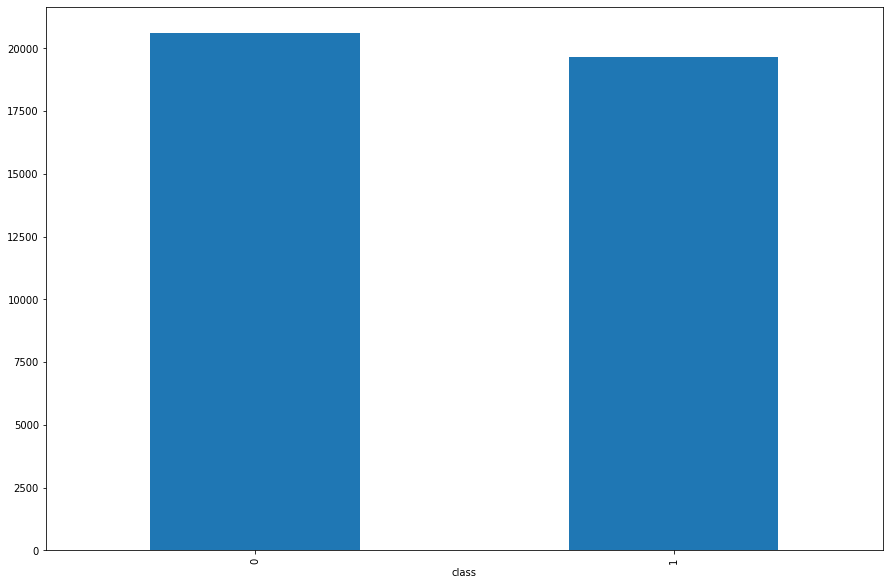

In [50]:
df1= data.groupby('class')['class'].count()
print(df1)
df1.plot(kind= 'bar', figsize=(15,10))

In [51]:
def process_tweet(tweet):
    stemmer = PorterStemmer()
    stopwords_english = stopwords.words('english')
    tweet = re.sub(r'^RT[\s]+', '', tweet)
    tweet = re.sub(r'RT', '', tweet)
    tweet = re.sub(r'@[A-Za-z0-9]+', '', tweet)
    tweet = re.sub(r'https?:\/\/.*[\r\n]*', '', tweet)
    tweet = splitTags(tweet)
    tokenizer = TweetTokenizer(preserve_case=False, strip_handles=True,
                               reduce_len=True)
    tweet_tokens = tokenizer.tokenize(tweet)
    tweets_clean = []
    for word in tweet_tokens:
        if (word not in stopwords_english and word not in string.punctuation):  # remove punctuation
            tweets_clean.append(word)
            stem_word = stemmer.stem(word)  # stemming word
#             tweets_clean.append(stem_word)

    return tweets_clean

In [52]:
additional  = ['rt','rts','retweet','RT','RTS','RETWEET']
swords = set().union(stopwords.words('english'),additional)

In [53]:
# data['tweet']=data['tweet'].apply(str)

In [54]:
data['processed_text'] = data['tweet'].apply(process_tweet)

In [55]:
data.head()
print(data.iloc[0]['tweet'],data.iloc[0]['processed_text'])

!!! RT @mayasolovely: As a woman you shouldn't complain about cleaning up your house. &amp; as a man you should always take the trash out... ['woman', 'complain', 'cleaning', 'house', 'man', 'always', 'take', 'trash', '...']


In [56]:
ps = PorterStemmer()


In [57]:
data['stemmed'] = data['processed_text'].apply(lambda x: [ps.stem(i) for i in x if i != ''])

In [58]:
data['processed_text'].head(100)

0      [woman, complain, cleaning, house, man, always...
1      [boy, dats, cold, ..., tyga, dwn, bad, cuffin,...
2      [dawg, ever, fuck, bitch, start, cry, confused...
3              [_g_anderson, _based, look, like, tranny]
4      [shit, hear, might, true, might, faker, bitch,...
                             ...                        
96      [going, back, school, sucks, dick, hoes, attend]
97                                [way, fuck, yo, bitch]
98     [_thunduh, come, never, bring, food, dont, car...
99     [richnow, show, hella, tinder, hoes, im, frien...
100                       [bout, cowboys, shutup, pussy]
Name: processed_text, Length: 100, dtype: object

In [59]:
data.to_csv('Stemmed_Data2.csv')

In [70]:
data.head()

,class,tweet,processed_text,stemmed
0,1,!!! RT @mayasolovely: As a woman you shouldn't...,"[woman, complain, cleaning, house, man, always...","[woman, complain, clean, hous, man, alway, tak..."
1,0,!!!!! RT @mleew17: boy dats cold...tyga dwn ba...,"[boy, dats, cold, ..., tyga, dwn, bad, cuffin,...","[boy, dat, cold, ..., tyga, dwn, bad, cuffin, ..."
2,0,!!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbaby...,"[dawg, ever, fuck, bitch, start, cry, confused...","[dawg, ever, fuck, bitch, start, cri, confus, ..."
3,0,!!!!!!!!! RT @C_G_Anderson: @viva_based she lo...,"[_g_anderson, _based, look, like, tranny]","[_g_anderson, _base, look, like, tranni]"
4,0,!!!!!!!!!!!!! RT @ShenikaRoberts: The shit you...,"[shit, hear, might, true, might, faker, bitch,...","[shit, hear, might, true, might, faker, bitch,..."


In [60]:
def strip_links(text):
    link_regex    = re.compile('((https?):((//)|(\\\\))+([\w\d:#@%/;$()~_?\+-=\\\.&](#!)?)*)', re.DOTALL)
    links         = re.findall(link_regex, text)
    for link in links:
        text = text.replace(link[0], ', ')    
    return text

In [61]:
# s = s.replace('(@[a-z0-9]+)\w+',' ')\
#       .replace('(http\S+)', ' ')\
#        .replace('([^0-9a-z \t])',' ')\
#        .replace(' +',' ')\
       

In [62]:
# print(s.replace('(@[a-z0-9]+)\w+',' ')\
#       .replace(r'https?:\/\/.*[\r\n]*', ' ')\
#        .replace('([^0-9a-z \t])',' ')\
#        .replace(' +',' ')
#         .replace('RT',' '))

In [63]:
s = "#ThisIsTag heyooooo #TagIt #HappyHumpDay"

In [64]:
l = [i  for i in s.split() if i.startswith("#") ]
print(l)

['#ThisIsTag', '#TagIt', '#HappyHumpDay']


In [65]:
for i in l:
    expanded = " ".join([a for a in re.split('([A-Z][a-z]+)', i[1:]) if a])
    s = s.replace(i,expanded)

In [66]:
print(s)

This Is Tag heyooooo Tag It Happy Hump Day


In [67]:
def splitTags(s):
    l = [i  for i in s.split() if i.startswith("#") ]
    for i in l:
        expanded = " ".join([a for a in re.split('([A-Z][a-z]+)', i[1:]) if a])
        s = s.replace(i,expanded)
    return s

In [68]:
splitTags("#ThisIsTag heyooooo #TagIt #HappyumpDay")

'This Is Tag heyooooo Tag It Happyump Day'

In [69]:

tweet = "@_somil_   yooo"
tweet = re.sub(r'@[A-Za-z0-9_]+', '', tweet)
print(tweet)

   yooo
